In [3]:
from PIL import Image
import numpy as np 

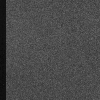

In [7]:
im = Image.open("nottingham/f005.gif")
im_array = np.asarray(im)

In [16]:
import os 
directory = "nottingham"
files = os.listdir(directory)
images = []
for filename in files:
    path2image = os.path.join(directory, filename)
    if os.path.isfile(path2image):
        image = Image.open(path2image)
        image_array = np.asarray(image)
        images.append(image_array)

In [17]:
min_x, min_y = 10000, 10000
for image in images:
    if image.shape[1] < min_x:
        min_x = image.shape[1]
    if image.shape[0] < min_y:
        min_y = image.shape[0]
print(min_x, min_y)
print(max_x, max_y)

358 437
549 387


In [18]:
for i, image in enumerate(images):
    im = Image.fromarray(image)
    if i == 0:
        im.show()
    im = im.resize((min_x, min_y))
    if i == 0:
        im.show()
    images[i] = np.asarray(im)
print(images[0].shape)

(437, 358)


In [77]:
from sklearn.preprocessing import StandardScaler
X = []
for image in images:
    image_vector = image.reshape((image.shape[0] * image.shape[1], ))
    X.append(image_vector)
stdsc = StandardScaler()
X = stdsc.fit_transform(X)
print(X.shape)

(100, 156446)


In [64]:
average_face = np.mean(images, axis=0)
im_average_face = Image.fromarray(average_face)

In [65]:
im_average_face.show()

In [59]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)
print(f"X: {X.shape}")
print(f"U: {U.shape}")
print(f"Sigma: {sigma.shape}")
print(f"VT: {VT.shape}")

X: (100, 156446)
U: (100, 100)
Sigma: (100,)
VT: (100, 156446)


In [60]:
s1 = sigma[np.where(sigma > 7.7 * 1e4)]
u1 = U[:, np.where(sigma > 7.7 * 1e4)]
vt1 = VT[:, np.where(sigma > 7.7 * 1e4)]
s1.shape

(2,)

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(X)
Xt = pca.transform(X)

In [82]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=2)
km.fit(Xt)
labels = km.predict(Xt)

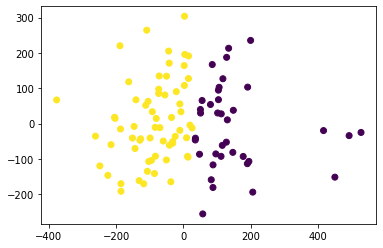

In [93]:
import matplotlib.pyplot as plt 

_ = plt.figure()
plt.scatter(Xt[:, 0], Xt[:, 1], c=labels)
plt.show()

In [87]:
Image.fromarray(images[2]).show()